In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\global_economy.csv"

df = pd.read_csv(path)
df.head()

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


In [7]:
aus = df[df['Country']=='Australia'].reset_index(drop=True)
aus.head(1)

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,Australia,AUS,1960,1.857319e+10,NaN,7.960458,14.061746,12.994452,10276477.0


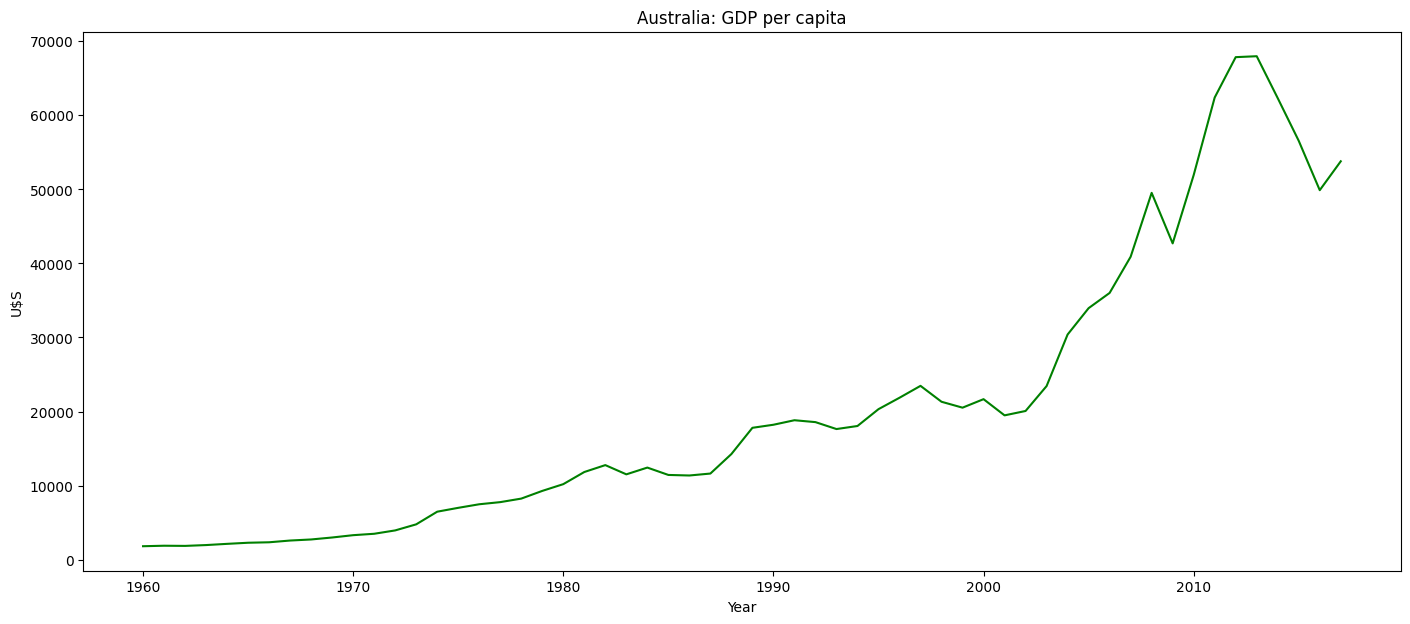

In [8]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(aus['Year'], aus['GDP'] / aus['Population'], c='green')
ax.set_xlabel('Year')
ax.set_ylabel('U$S')
ax.set_title('Australia: GDP per capita')
plt.show()